In [1]:
#importing required libraries
import numpy as np                                              #for array and numerical data calculation
import pandas as pd                                             #for making dataframe and loding data
import matplotlib.pyplot as plt                                 #for visualization
import seaborn as sns                                           #for visualization
sns.set()
from statsmodels.tsa.seasonal import seasonal_decompose         #for decompostion of plot into trend,seasonality and residual
from statsmodels.tsa.stattools import acf,pacf,adfuller         #for plotting acf plot,pacf plot and checking stationarity through Augmented dickey fuller test
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA                   #for building ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX          #for building SARIMAX model if seasonality is presnt in data
import statsmodels.api as sm


import warnings                                                  # to filter out warnings
warnings.simplefilter(action='ignore')

In [2]:
df=pd.read_csv('Wb_production.csv')

df.head()

,Date,West Bengal
0,01-01-2019,108.2
1,02-01-2019,110.2
2,03-01-2019,106.8
3,04-01-2019,107.0
4,05-01-2019,106.4


In [3]:
# Setting Date as Index 
df.set_index('Date',inplace=True)


In [4]:
# Checking the null values
df.isnull().sum()
from datetime import datetime

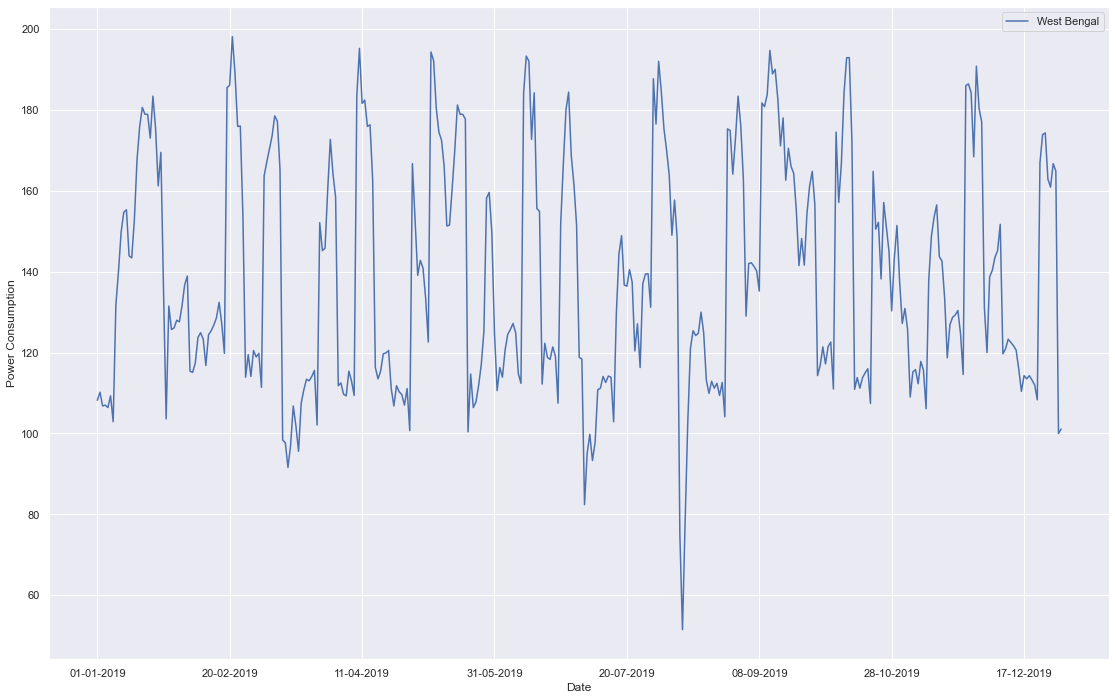

In [5]:
# Data Distribution
df.plot(figsize=(19,12))
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()

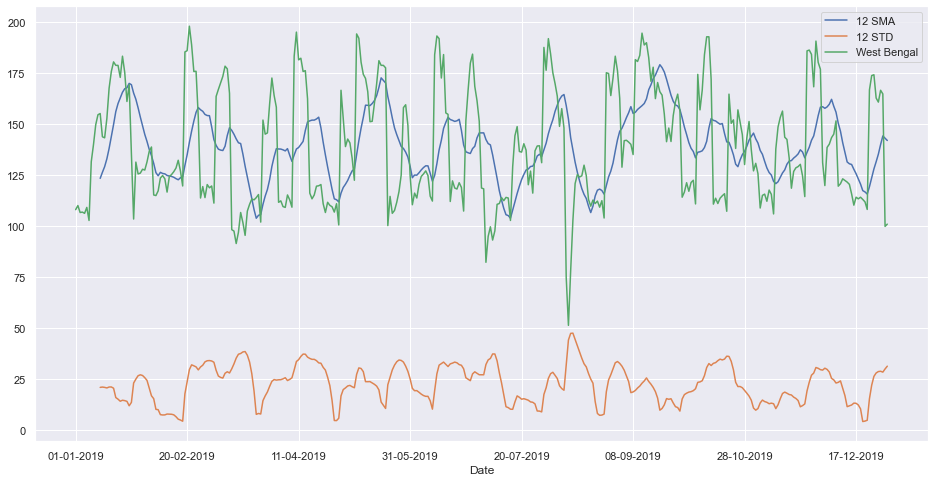

In [6]:
df['West Bengal'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
df['West Bengal'].rolling(12).std().plot(label='12 STD')
df['West Bengal'].plot()
plt.legend()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose


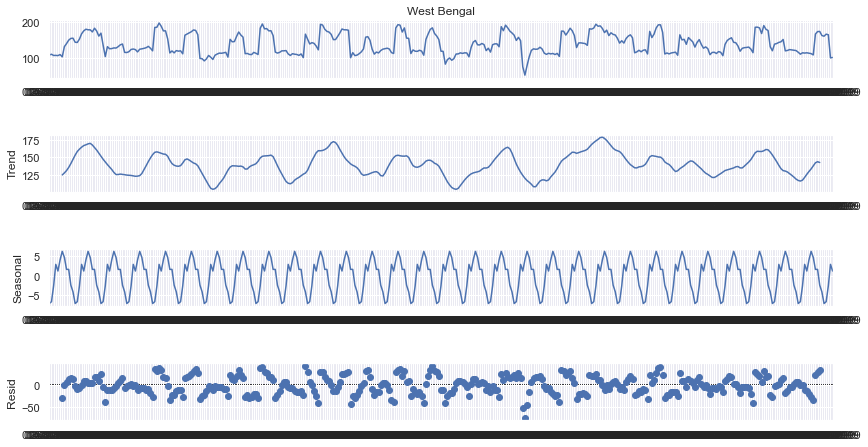

In [8]:
decomp = seasonal_decompose(df['West Bengal'],period=12)
fig = decomp.plot()
fig.set_size_inches(14,7)

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
fuller_test = adfuller(df['West Bengal'])

In [11]:
fuller_test

(-5.652374451303717,
 9.793815562784497e-07,
 7,
 357,
 {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036},
 2966.249157589062)

In [12]:
def test_p_value(data):
        fuller_test = adfuller(data)
        print('P-value: ',fuller_test[1])
        if fuller_test[1] <= 0.05:
            print('Reject null hypothesis, data is stationary')
        else:
            print('Do not reject null hypothesis, data is not stationary')

In [13]:
test_p_value(df['West Bengal'])

P-value:  9.793815562784497e-07
Reject null hypothesis, data is stationary


In [14]:
electricity_series_diff = df.diff().dropna()
fuller_test = adfuller(df['West Bengal'])
fuller_test

(-5.652374451303717,
 9.793815562784497e-07,
 7,
 357,
 {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036},
 2966.249157589062)

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

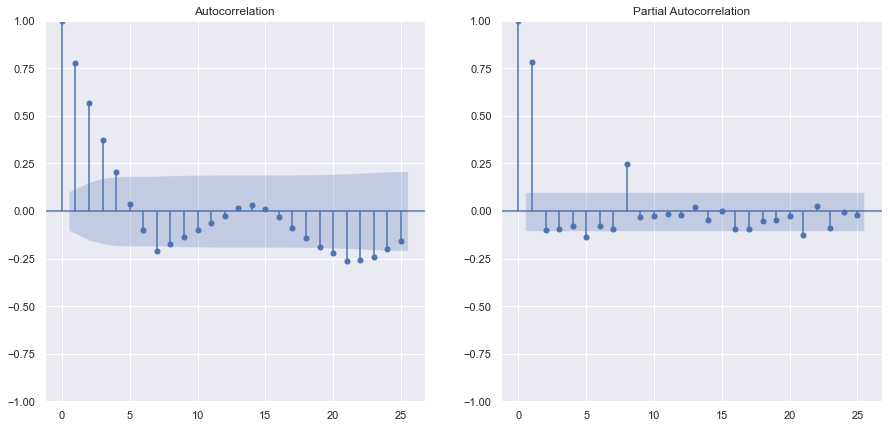

In [16]:
#fig,ax=plt.subplots(1,2,figsize=(15,7))
#plot_acf(df,lags=25,ax=ax[0])
#plot_pacf(df,lags=25,ax=ax[1])
#plt.show()
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plot_acf(df['West Bengal'], lags=25, ax=ax[0])
plot_pacf(df['West Bengal'], lags=25, ax=ax[1])
plt.show()


In [17]:
 model = sm.tsa.statespace.SARIMAX(df['West Bengal'],order=(2,1,1),seasonal_order=(1,1,1,12))

In [18]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        West Bengal   No. Observations:                  365
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1538.349
Date:                            Fri, 24 May 2024   AIC                           3088.698
Time:                                    14:35:14   BIC                           3111.879
Sample:                                         0   HQIC                          3097.923
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8547      0.071     12.120      0.000       0.716       0.993
ar.L2         -0.0865      0.070     -1.236      0.216      -0.224       0.051
ma.L1         -0.9996      0.988     -1.012      0.312      -2.936       0.937
ar.S.L12       0.0067      0.098      0.068      0.945      -0.185       0.198
ma.S.L12      -0.9960      0.630     -1.580      0.114      -2.232       0.240
sigma2       319.7557    370.923      0.862      0.389    -407.239    1046.750
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               336.87
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.68
Prob(H) (two-sided):                  0.79   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Fit the SARIMAX model to your data
results = model.fit()

# Print the summary of the model
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                        West Bengal   No. Observations:                  365
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1538.349
Date:                            Fri, 24 May 2024   AIC                           3088.698
Time:                                    14:35:15   BIC                           3111.879
Sample:                                         0   HQIC                          3097.923
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8547      0.071     12.120      0.000       0.716       0.993
ar.L2         -0.0865      0.070   

In [20]:
# Print the estimated AR parameters
print("Non-seasonal AR parameters:", ar_params)

# Print the estimated seasonal AR parameters
print("Seasonal AR parameters:", seasonal_ar_params)



NameError: name 'ar_params' is not defined

In [21]:
results.resid

Date
01-01-2019    108.200000
02-01-2019      2.000889
03-01-2019     -3.395940
04-01-2019      0.203336
05-01-2019     -0.597871
                 ...    
27-12-2019      8.005738
28-12-2019     11.353420
29-12-2019      1.180121
30-12-2019    -63.827088
31-12-2019     -1.047706
Length: 365, dtype: float64

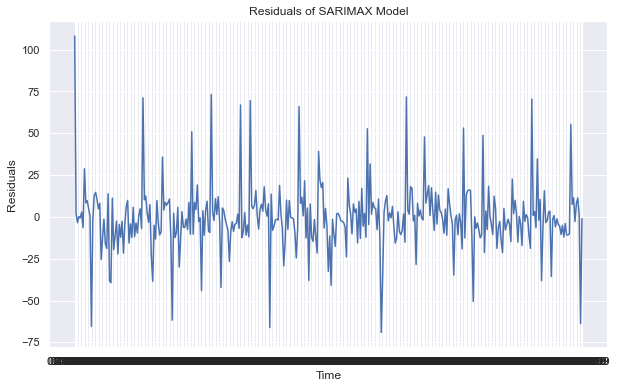

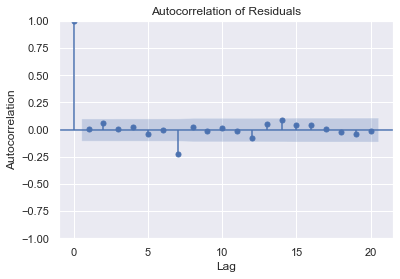

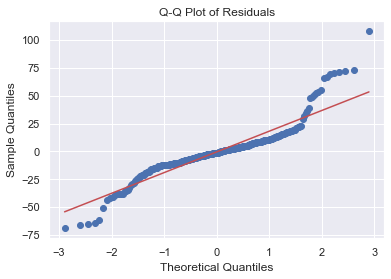

In [22]:
import scipy.stats as stats

residuals = results.resid

# Plot the residuals over time
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Check for autocorrelation in the residuals
plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Check for normality of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()



<AxesSubplot:xlabel='Date'>

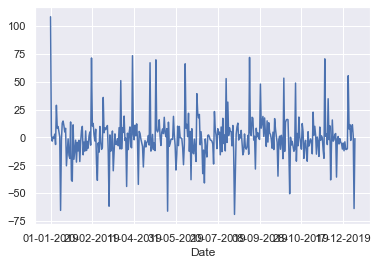

In [23]:
 results.resid.plot()

<AxesSubplot:ylabel='Density'>

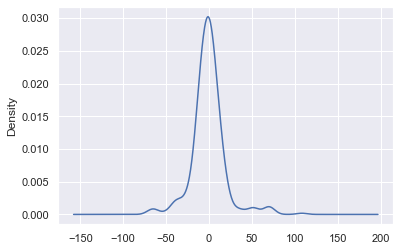

In [24]:
results.resid.plot(kind='kde')

In [25]:
df['prediction'] = results.predict()

<AxesSubplot:xlabel='Date'>

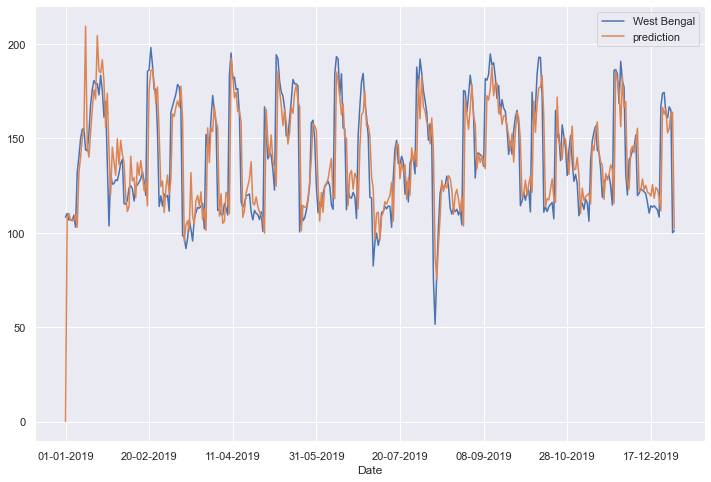

In [26]:
df[['West Bengal','prediction']].plot(figsize=(12,8))

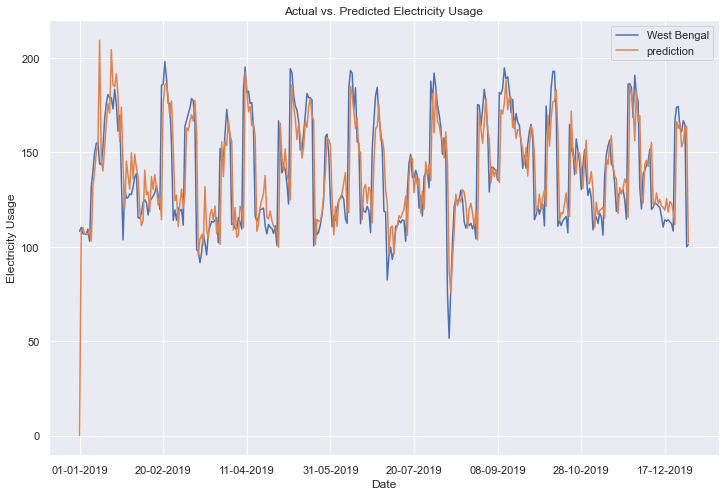

In [27]:
# Assuming your DataFrame contains a column named 'prediction' with the predicted values
df[['West Bengal', 'prediction']].plot(figsize=(12, 8))
plt.title('Actual vs. Predicted Electricity Usage')
plt.xlabel('Date')
plt.ylabel('Electricity Usage')
plt.grid(True)
plt.show()


In [28]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(df['West Bengal'],df['prediction']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 19.857276721533996
